<a href="https://www.kaggle.com/code/mosesmoncy/nasa-airfoil-self-noise-predictor?scriptVersionId=126874488" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Data Set Information:
The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

* f: frequency
* alpha: Angle of attack
* c: Chord length
* U_infinity: Free-stream velocity
* delta: Suction side displacement thickness
* SSPL: Scaled Sound Pressure Level

Airfoil noise, produced when unsteady fluid flow interacts with an airfoil surface, is important in many applications ranging from wind turbines and cooling fans to aircraft and submarines.

A vital component of the total airframe noise is the airfoil self-noise, which is due to the interaction between an airfoil blade and the turbulence produced in its boundary layer and near wake. Performance optimization can be applied to understand the behavior of airfoils and make designs with reduced noise.

A prediction method is developed for the self-generated noise of an airfoil blade encountering smooth flow. The prediction methods for the individual self-noise mechanisms are semi-empirical and are based on previous theoretical studies and data obtained from tests of two- and three-dimensional airfoil blade sections. The self-noise mechanisms are due to specific boundary-layer phenomena, that is, the boundary-layer turbulence passing the trailing edge, separated-boundary-layer and stalled flow over an airfoil, vortex shedding due to laminar boundary layer instabilities, vortex shedding from blunt trailing edges, and the turbulent vortex flow existing near the tip of lifting blades.

Model is created to predict Scaled Sound Pressure Level (SSPL) using Regression models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
a=pd.read_csv('/kaggle/input/airfoil-dataset/AirfoilSelfNoise.csv')
a

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
# read first five data
a.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
# read last five data
a.tail()

,f,alpha,c,U_infinity,delta,SSPL
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [5]:
a.describe

<bound method NDFrame.describe of          f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1498  2500   15.6  0.1016        39.6  0.052849  110.264
1499  3150   15.6  0.1016        39.6  0.052849  109.254
1500  4000   15.6  0.1016        39.6  0.052849  106.604
1501  5000   15.6  0.1016        39.6  0.052849  106.224
1502  6300   15.6  0.1016        39.6  0.052849  104.204

[1503 rows x 6 columns]>

In [6]:
a.isna().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

In [7]:
a.columns

Index(['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL'], dtype='object')

In [8]:
a.corr()

,f,alpha,c,U_infinity,delta,SSPL
f,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
alpha,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
c,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
U_infinity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
delta,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SSPL,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


<AxesSubplot:>

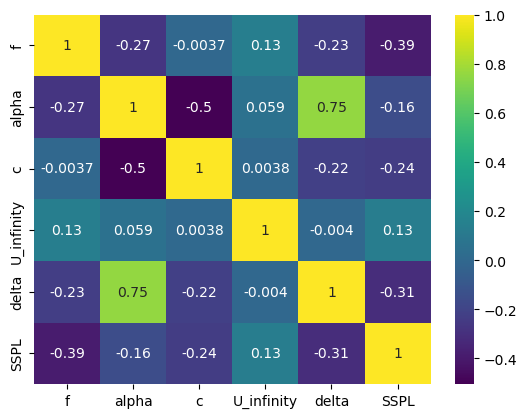

In [9]:
sns.heatmap(a.corr(),annot=True,cmap='viridis')

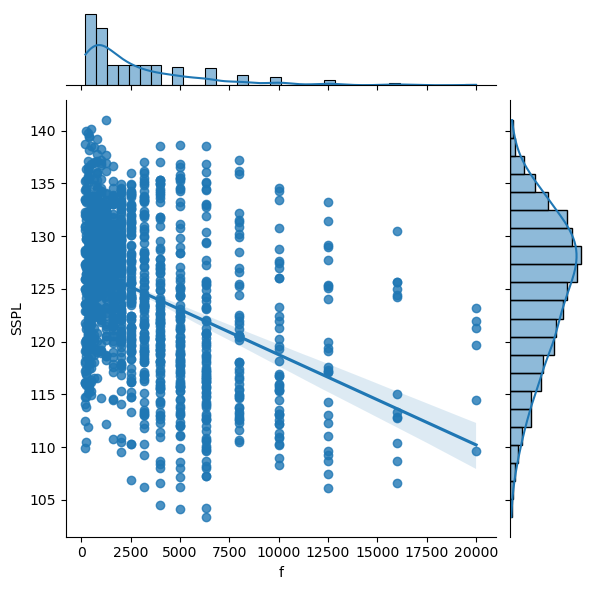

In [10]:
sns.jointplot(x='f',y='SSPL',data=a,kind='reg')

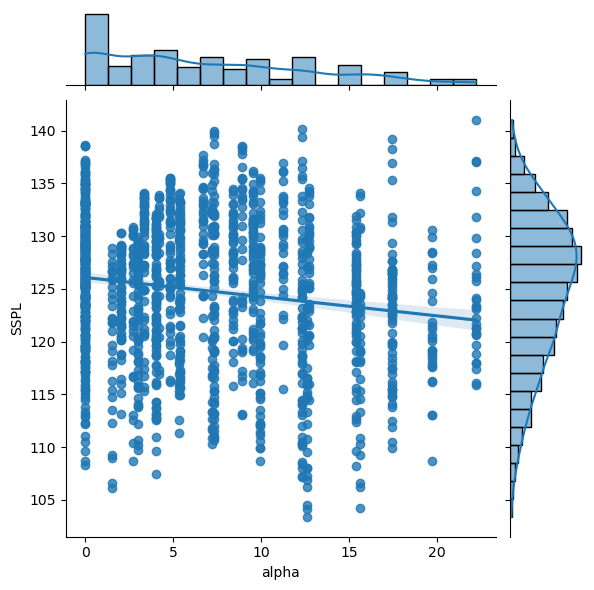

In [11]:
sns.jointplot(x='alpha',y='SSPL',data=a,kind='reg')

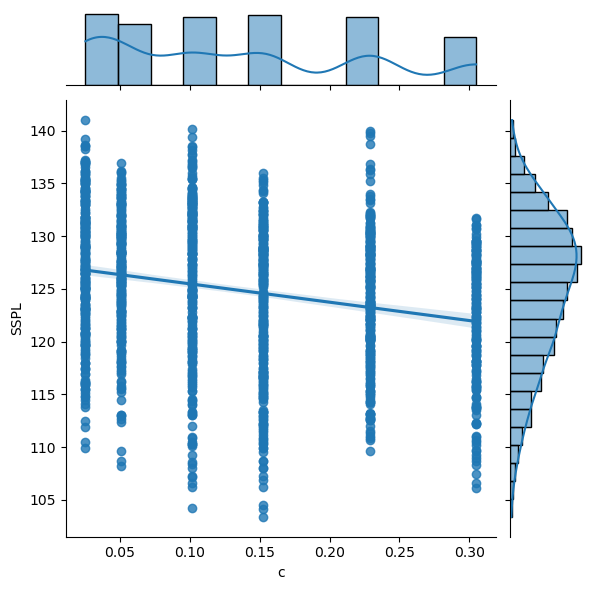

In [12]:
sns.jointplot(x='c',y='SSPL',data=a,kind='reg')

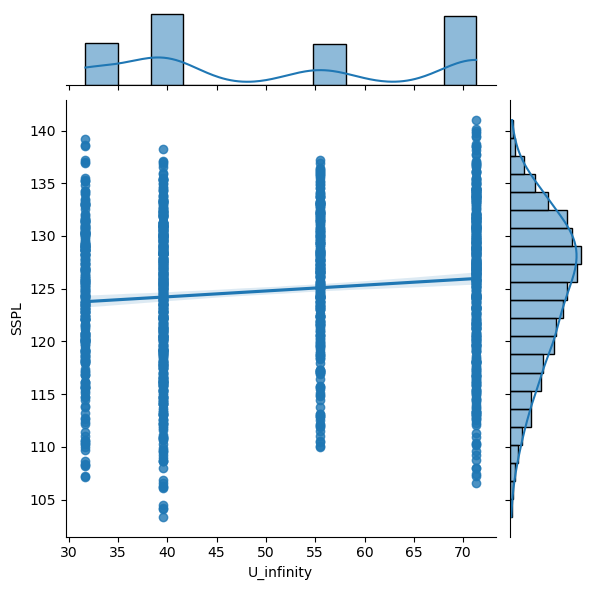

In [13]:
sns.jointplot(x='U_infinity',y='SSPL',data=a,kind='reg')

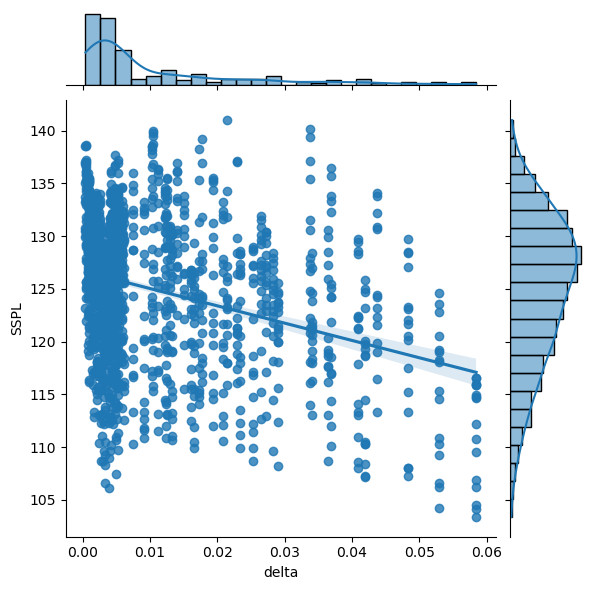

In [14]:
sns.jointplot(x='delta',y='SSPL',data=a,kind='reg')

<AxesSubplot:xlabel='SSPL', ylabel='Count'>

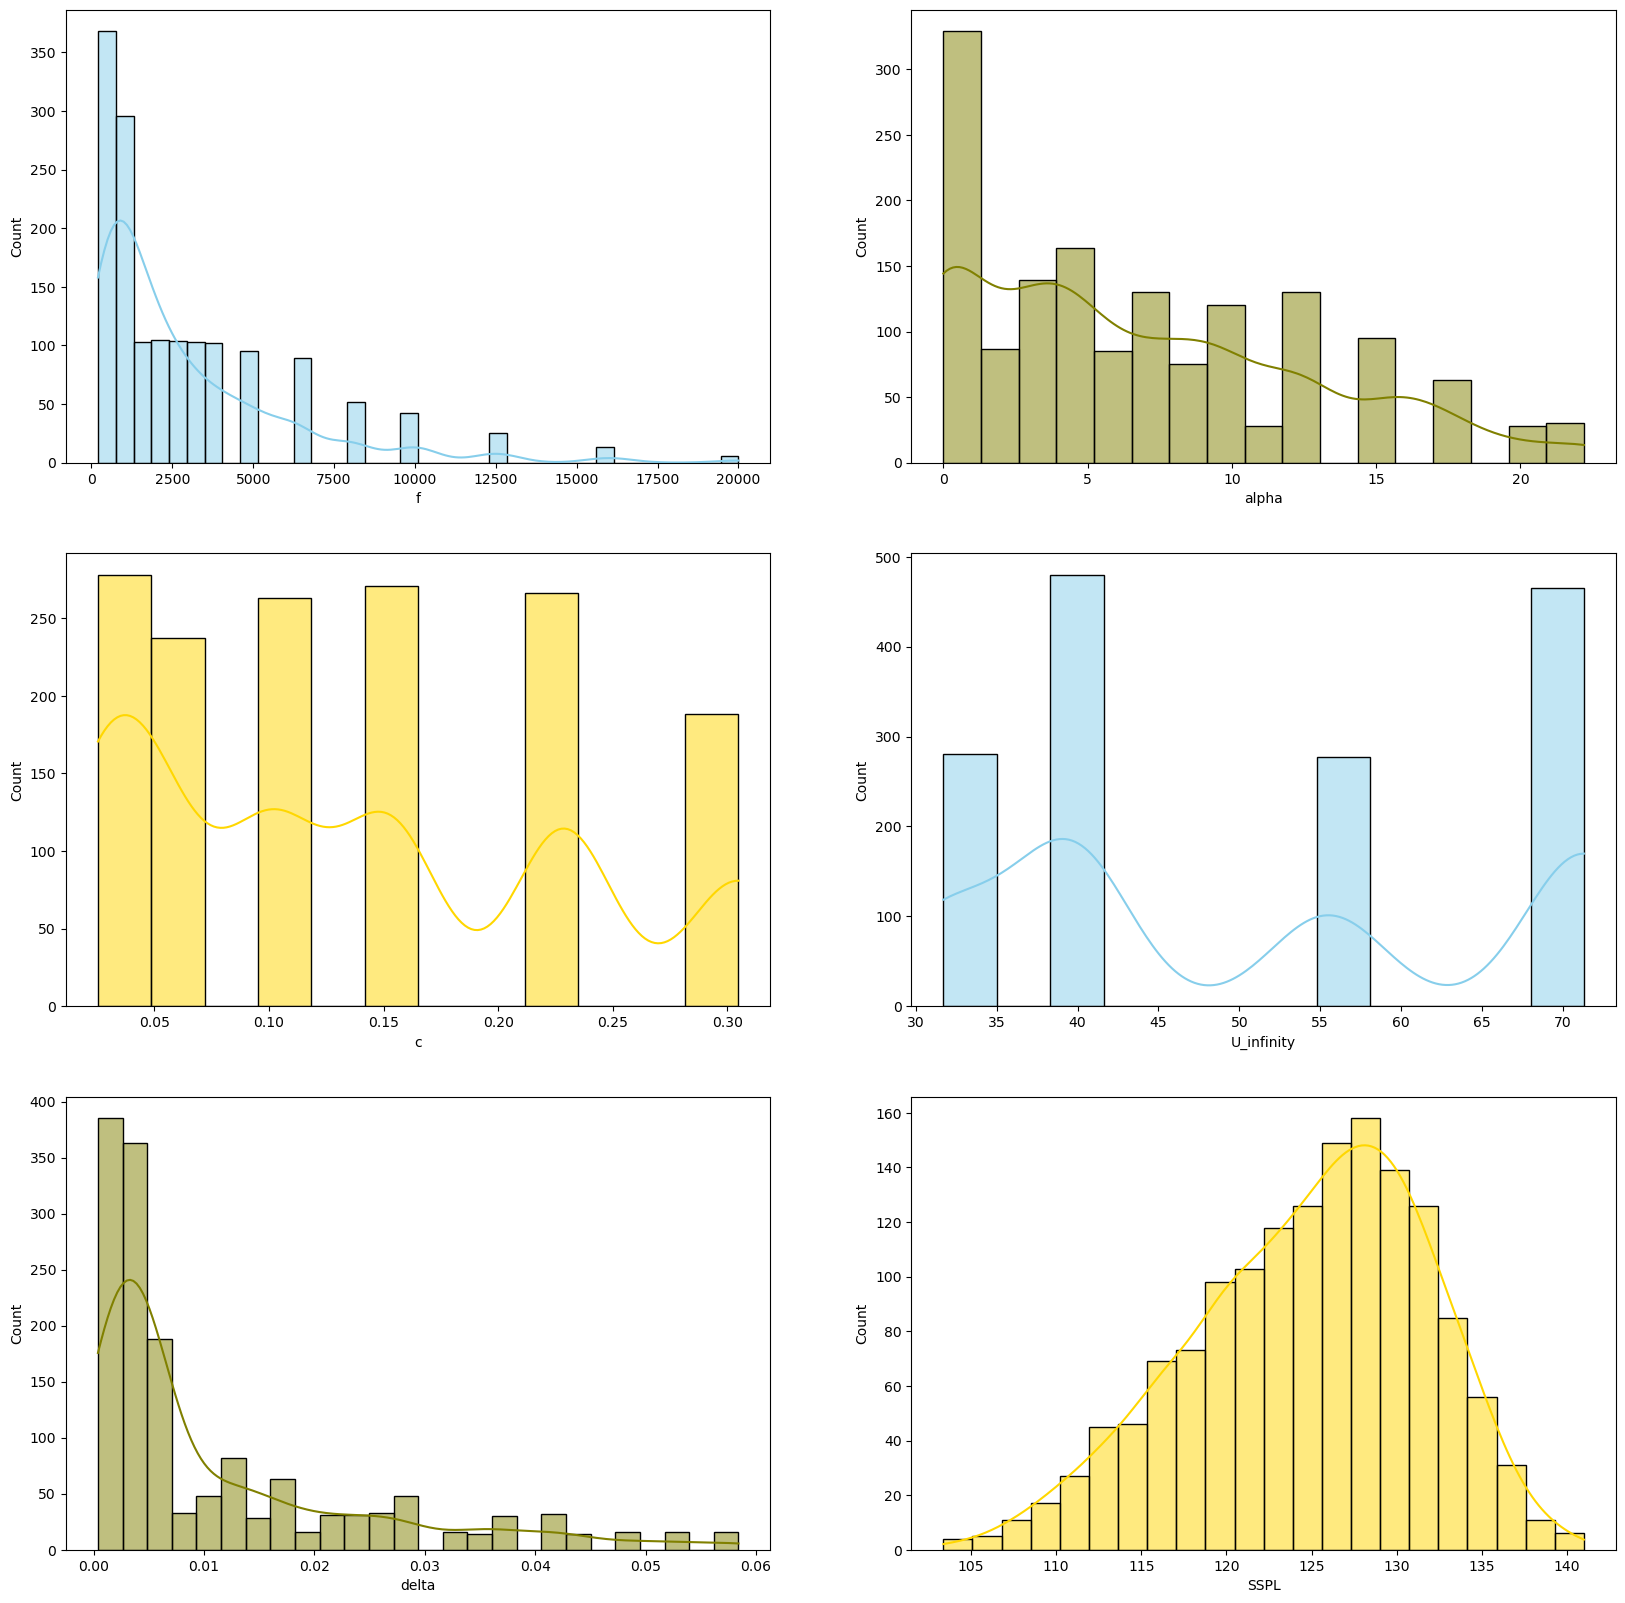

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
sns.histplot(data=a['f'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["alpha"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["c"], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a["U_infinity"], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=a["delta"], kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=a["SSPL"], kde=True, color="gold", ax=axs[2, 1])


In [16]:
# splitting x(inputs) and y(outputs)

x=a.drop(['SSPL'],axis=1)
y=a["SSPL"]
x

,f,alpha,c,U_infinity,delta
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [17]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: SSPL, Length: 1503, dtype: float64

In [18]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,f,alpha,c,U_infinity,delta
1191,2500,17.4,0.0254,39.6,0.017221
1350,2500,6.7,0.1016,71.3,0.004783
1276,4000,0.0,0.1016,39.6,0.001463
527,630,2.7,0.1524,39.6,0.002948
199,16000,0.0,0.2286,71.3,0.002143
...,...,...,...,...,...
1130,250,12.7,0.0254,39.6,0.013025
1294,800,3.3,0.1016,71.3,0.002028
860,630,11.2,0.0508,39.6,0.015048
1459,315,12.3,0.1016,31.7,0.041876


In [19]:
y_train

1191    124.154
1350    131.458
1276    127.801
527     125.809
199     114.984
         ...   
1130    121.547
1294    131.074
860     133.130
1459    124.717
1126    128.978
Name: SSPL, Length: 1052, dtype: float64

In [20]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,f,alpha,c,U_infinity,delta
51,400.819753,1.171616,-1.559739,32.870461,0.614778
1465,1250.519065,11.436003,0.426923,32.870461,-2.226964
184,2500.076876,4.509628,-1.559739,40.259278,0.431751
1000,3999.546250,1.171616,1.171922,32.870461,0.826506
746,4999.192499,1.171616,0.923589,55.130440,0.802743
...,...,...,...,...,...
522,7998.131247,3.424774,-0.069742,69.908072,0.679195
140,6298.732623,3.675125,-1.559739,40.259278,0.493574
1085,500.784378,9.099394,1.171922,40.259278,0.527413
1422,3999.546250,11.436003,0.426923,69.908072,-1.630332


In [21]:
# Linear Regression model creation
from sklearn.metrics import mean_absolute_percentage_error

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
print('percentage error is ', mean_absolute_percentage_error(y_test,y_pred))


Mean Absolute Error is 11273.847912327798
Mean Squared Error is 265953774.15216848
Root Mean Square Error is 16308.08922443609
percentage error is  92.46288867843376


In [22]:
# Creating Decision Tree Regression 

from sklearn.metrics import mean_absolute_percentage_error

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
print('percentage error is ', mean_absolute_percentage_error(y_test,y_pred))


Mean Absolute Error is 16.110101995565408
Mean Squared Error is 305.2594364700665
Root Mean Square Error is 17.471675262265677
percentage error is  0.12651884309343978


In [23]:
# constant(intercept) and slope(coeffeicent)

print("the slope is",model.coef_)
print("the constant value is",model.intercept_)
# we need to find the slopes of each and every independent variables

list(zip(x,model.coef_))



the slope is [-4.17178375 -2.13916414 -3.24505888  1.55920111 -2.04950565]
the constant value is 124.88871958174907


[('f', -4.1717837468377255),
 ('alpha', -2.1391641424907486),
 ('c', -3.2450588778535017),
 ('U_infinity', 1.559201114286559),
 ('delta', -2.0495056459007195)]

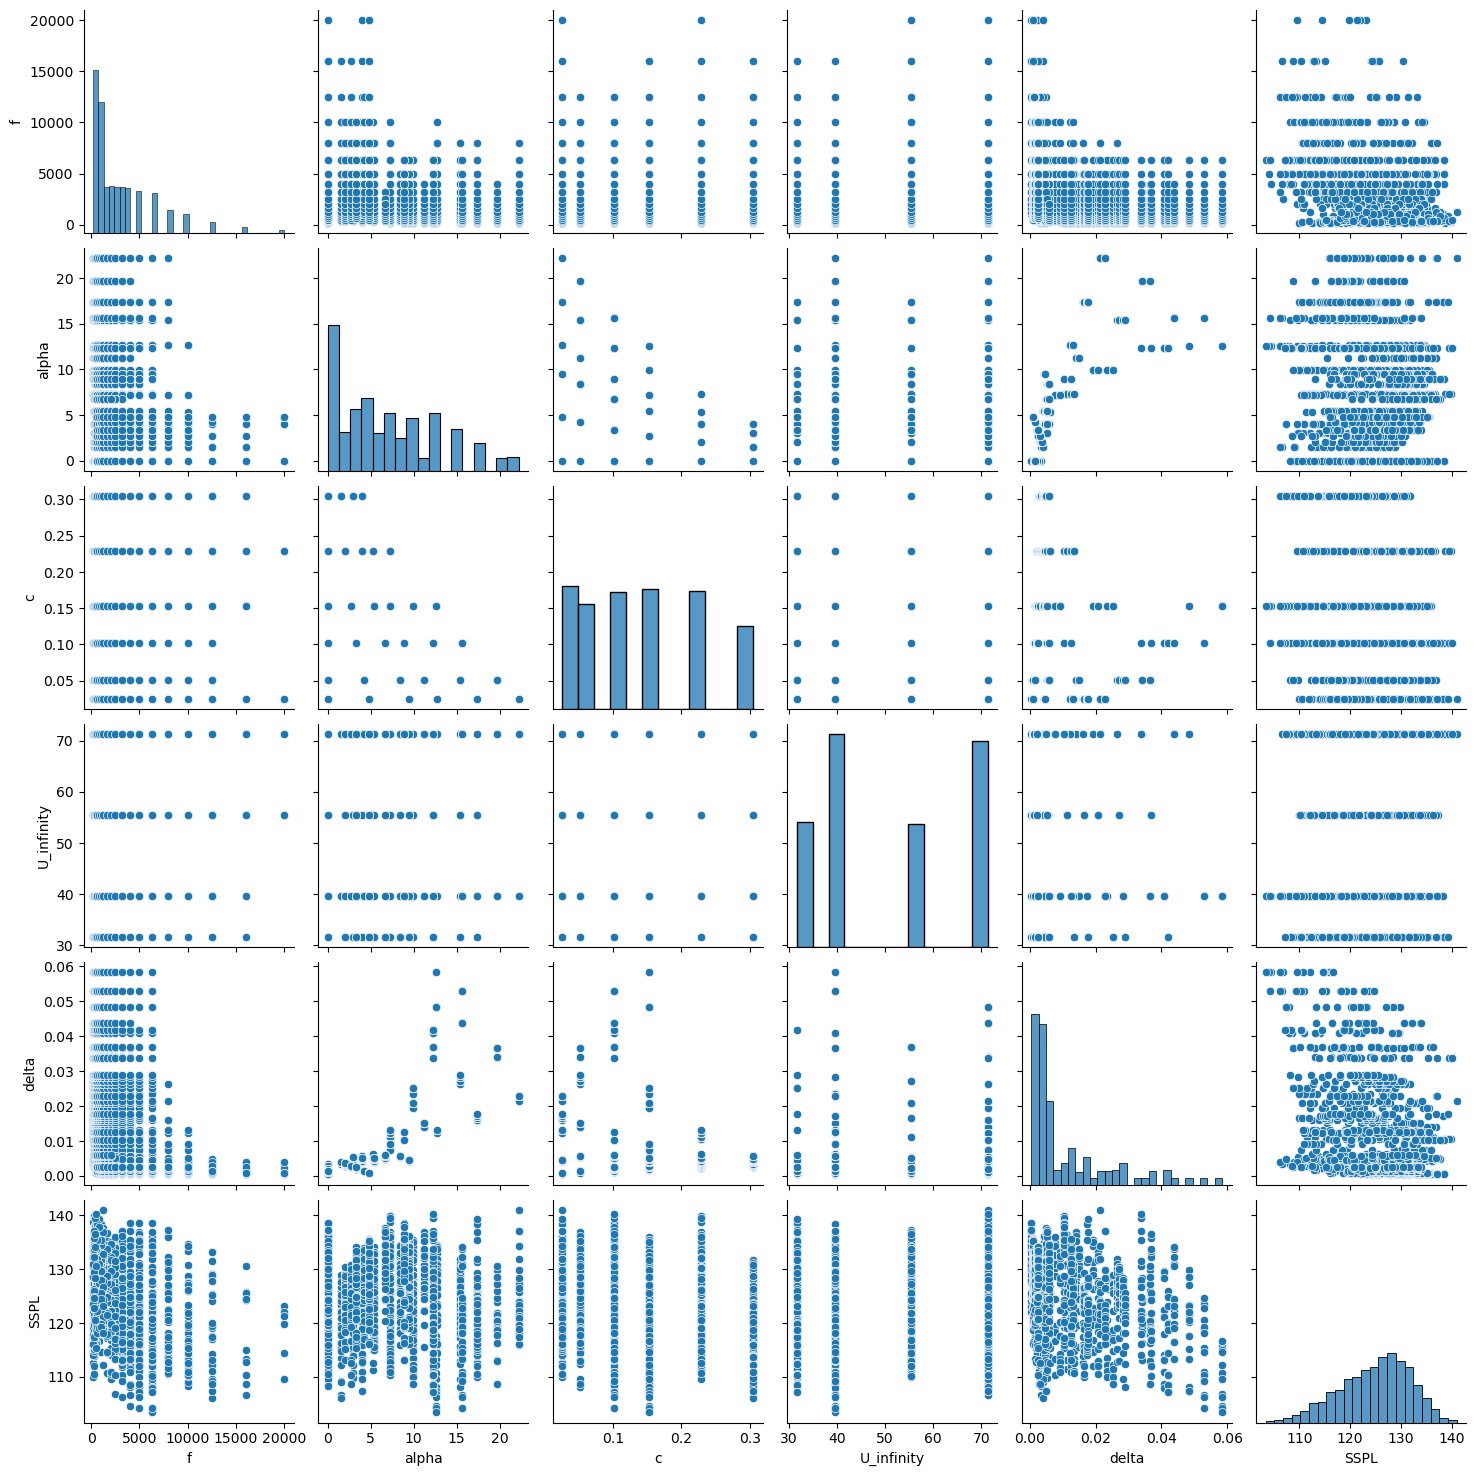

In [24]:
sns.pairplot(a)